<a href="https://colab.research.google.com/github/khoji-code/Data-Science-AI-for-Business-Portfolio/blob/main/AI_Powered_Customer_Segmentation_with_K_Means_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Powered Customer Segmentation with K Means and PCA

### Project Overview
* Utilizes a real-world **Wholesale Customer** dataset to identify distinct purchasing patterns.
* Employs two key **unsupervised learning** techniques:
    * **K-Means Clustering:** An algorithm that automatically groups similar customers together into a predefined number of segments.
    * **Principal Component Analysis (PCA):** A dimensionality reduction technique used to create a clear 2D visualization of the complex, multi-dimensional customer data.
* The process involves data preprocessing, determining the optimal number of clusters using the **Elbow Method**, and then training the K-Means model.
* The final output is a scatter plot that visually separates the discovered customer segments and a set of **data-driven customer personas**.

***

### Purpose of the Project
* To transform raw transactional data into a **strategic framework** for understanding a diverse customer base.
* To automate the discovery of **meaningful customer segments** without needing pre-labeled data, allowing the data itself to reveal the underlying patterns.
* To create **actionable customer personas** (e.g., "High-Value Frequent Shoppers," "Bulk Buyers," "Small Order Customers"), which can directly guide business strategy.
* To provide a clear, visual tool that empowers marketing, sales, and product teams to make **data-driven decisions** for targeted campaigns, personalized offers, and inventory management.

### Dataset:
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## INSTALLATION

In [1]:
!pip install pandas scikit-learn matplotlib seaborn kaggle -q
print("Libraries installed")

Libraries installed


## KAGGLE API SETUP & DATASET DOWNLOAD

In [2]:
import os
from google.colab import files

print("Upload your kaggle.json file")
uploaded = files.upload()

if "kaggle.json" in uploaded:
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Kaggle API configured.")

    !kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
    !unzip -o customer-segmentation-tutorial-in-python.zip -d customer_data
    print("Mall Customer Segmentation Dataset downloaded and unzipped successfully")
    DATA_LOADED_SUCCESSFULLY = True
else:
    print("kaggle.json not found")
    DATA_LOADED_SUCCESSFULLY = False

Upload your kaggle.json file


Saving kaggle.json to kaggle.json
Kaggle API configured.
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 6.35MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: customer_data/Mall_Customers.csv  
Mall Customer Segmentation Dataset downloaded and unzipped successfully


## IMPORT LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set plotting style
sns.set(style='whitegrid')

print("libraries imported")

libraries imported


## DATA LOADING AND EXPLORATORY DATA ANALYSIS (EDA)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB

First 5 rows of the data:
   Gender  Age  Annual_Income  Spending_Score
0       1   19             15              39
1       1   21             15              81
2       0   20             16               6
3       0   23             16              77
4       0   31             17              40


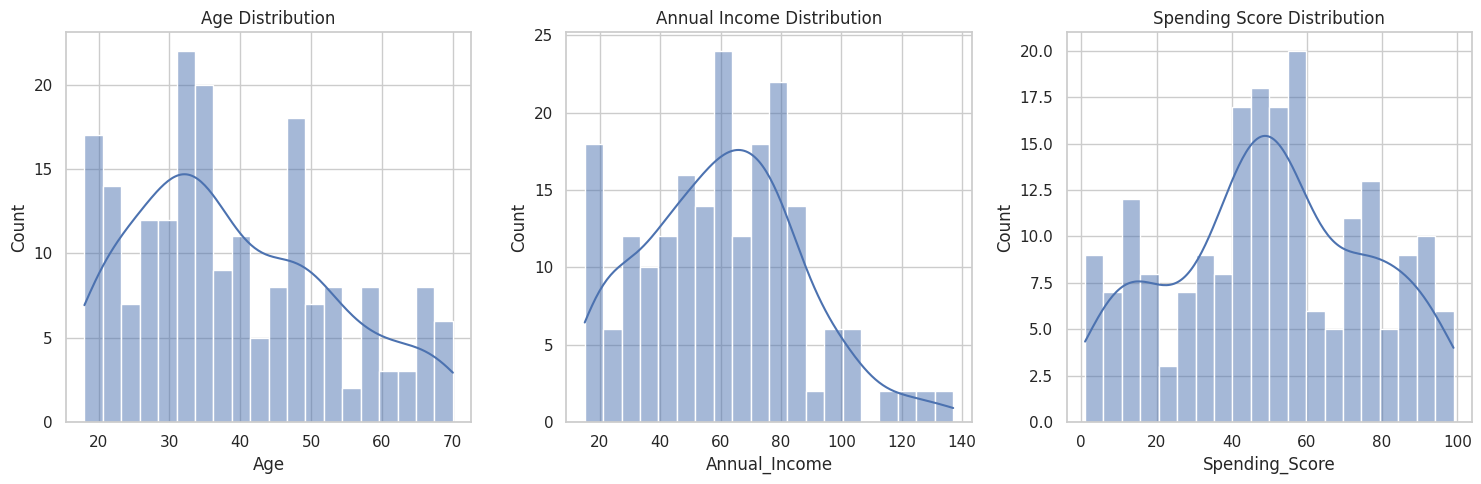

In [5]:
if DATA_LOADED_SUCCESSFULLY:
    try:
        # Load data
        df = pd.read_csv('customer_data/Mall_Customers.csv')

        # Data Cleaning and Preprocessing
        # Rename columns for easier access
        df.rename(columns={
            'Annual Income (k$)': 'Annual_Income',
            'Spending Score (1-100)': 'Spending_Score'
        }, inplace=True)

        # Drop the CustomerID as it's not needed for clustering
        df.drop('CustomerID', axis=1, inplace=True)

        # Convert 'Gender' to numerical format
        df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

        print("Dataset information:")
        df.info()
        print("\nFirst 5 rows of the data:")
        print(df.head())

        # Exploratory Data Analysis
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(df['Age'], kde=True, bins=20)
        plt.title('Age Distribution')

        plt.subplot(1, 3, 2)
        sns.histplot(df['Annual_Income'], kde=True, bins=20)
        plt.title('Annual Income Distribution')

        plt.subplot(1, 3, 3)
        sns.histplot(df['Spending_Score'], kde=True, bins=20)
        plt.title('Spending Score Distribution')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print("Data file not found")
        df = None
else:
    print("Skipping data processing because dataset download failed")


## OPTIMAL CLUSTER IDENTIFICATION (ELBOW METHOD)

 * Before we can segment our customers, we need to know how many segments to
create.

* The Elbow Method is a data-driven way to find this optimal number.
* We run K-Means for a range of cluster counts and plot the "inertia" (a measure
of how tightly grouped the clusters are).
* The "elbow" of the curve indicates
the best number of clusters.

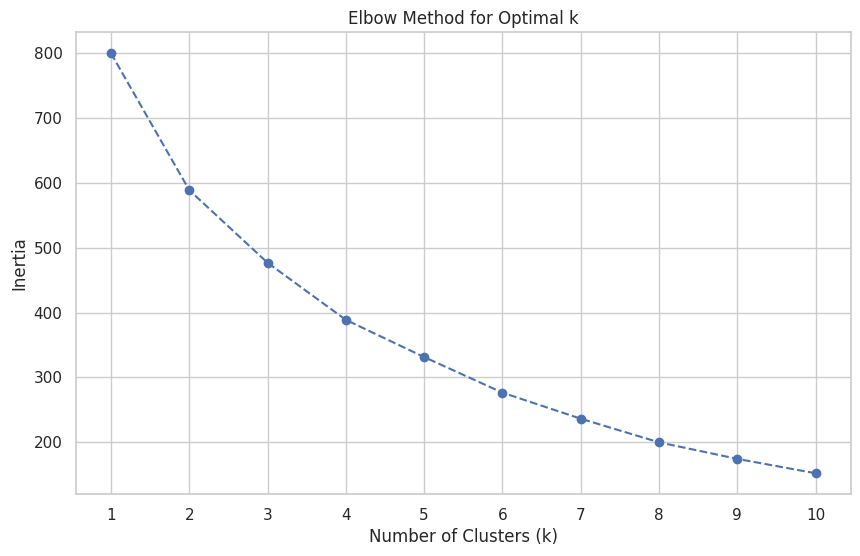

✅ Optimal number of clusters identified: k = 5


In [6]:
if df is not None:
    # Scale the data before clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # Calculate inertia for a range of k values
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Based on the plot, the "elbow" is clearly at k=5
    OPTIMAL_K = 5
    print(f"✅ Optimal number of clusters identified: k = {OPTIMAL_K}")

else:
    print("Skipping analysis because data is not loaded")


## K-MEANS CLUSTERING AND PCA VISUALIZATION

 * Now we apply the K-Means algorithm with our optimal k=5.
 * To visualize the
high-dimensional clusters, we use PCA to reduce the data to two principal
components, which we can then plot on a 2D scatter plot.

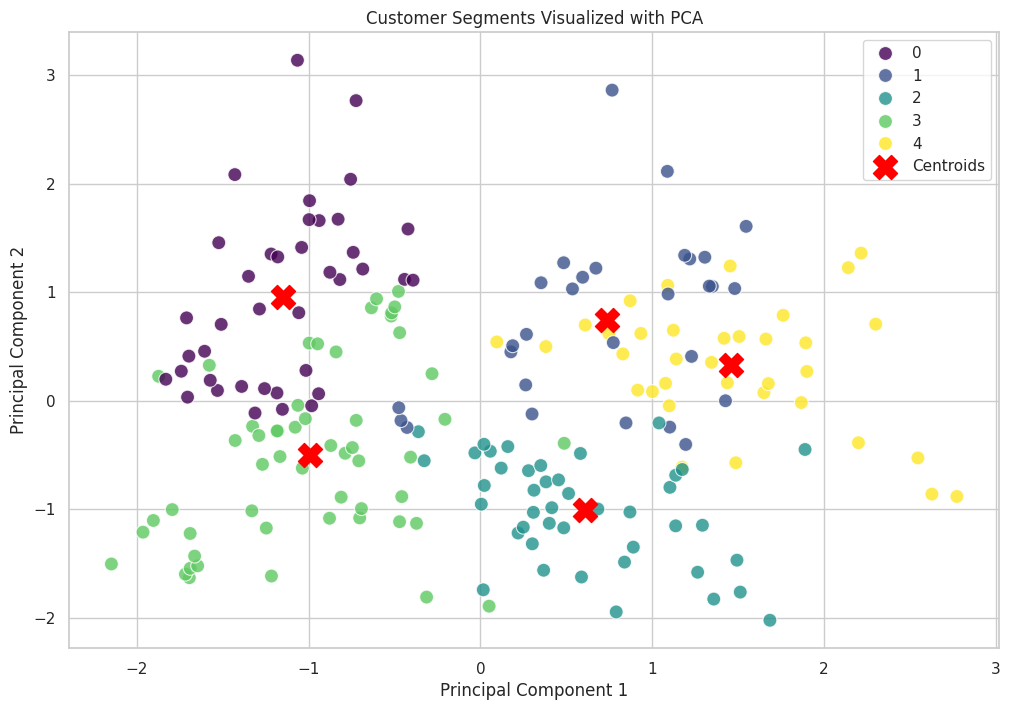

In [7]:
if 'X_scaled' in locals():
    # K-Means Clustering
    kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    df['Cluster'] = clusters

    # Principal Component Analysis (PCA)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    df_pca['Cluster'] = clusters

    # Visualization
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.8)

    # Plot cluster centers
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='red', marker='X', label='Centroids')

    plt.title('Customer Segments Visualized with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

else:
    print("Skipping clustering because data was not prepared")

## SEGMENT ANALYSIS AND STRATEGIC INSIGHTS

In [9]:
if 'df' in locals() and 'Cluster' in df.columns:
    # Calculate the mean of each feature for each cluster
    segment_analysis = df.groupby('Cluster').mean()

    print("\nAverage Characteristics per Customer Segment")
    print(segment_analysis)

else:
    print("Skipping segment analysis because clustering was not performed.")


Average Characteristics per Customer Segment
           Gender        Age  Annual_Income  Spending_Score
Cluster                                                    
0        0.461538  32.692308      86.538462       82.128205
1        0.448276  36.482759      89.517241       18.000000
2        0.000000  49.813953      49.232558       40.069767
3        0.407407  24.907407      39.722222       61.203704
4        1.000000  55.714286      53.685714       36.771429


## Define Personas based on the analysis

### Strategic Customer Personas
* Persona 1 (Careful Spenders): High income, but low spending score.
Potential for premium products.
* Persona 2 (Standard Customers): Average income and average spending. The core customer base.
* Persona 3 (Target Audience): Young, with high spending scores despite lower incomes. Ideal for trend-based marketing.
* Persona 4 (Low-Value): Low income and low spending score. Less of a priority for marketing spend.
* Persona 5 (High-Value/VIP): High income and high spending score. The most valuable segment; focus on retention and loyalty.



## CONCLUSION AND STRATEGIC IMPLICATIONS

1. **Automated Segment Discovery:** The K-Means algorithm successfully identified 5 distinct and meaningful customer segments from the raw data, validated by the Elbow Method.
 2. **Intuitive Visualization (PCA):** By using PCA, we were able to create a clear 2D visualization of the customer segments, making the complex data structure easy for business stakeholders to understand.
 3.  **Actionable Customer Personas:** We analyzed the characteristics of each cluster to create strategic personas. This transforms the raw data into a powerful tool for targeted marketing, personalization, and product development.
 4. **Direct Business Application:** This analysis provides a direct roadmap for a marketing team. They now know exactly who their different customer groups are and can design specific campaigns to engage each one effectively, maximizing ROI and customer satisfaction.

This project demonstrates how unsupervised learning can be used to extract significant strategic value from customer data, forming the foundation of a modern, data-driven business strategy.